# Data Collection, Cleaning and Exploratory Data Analysis for Expanded Dataset

For the expanded version, we gathered information from wrds.wharton.uppenn.edu (Wharton Research Data Services )by matching the international securities identification number of the comapies ranged from 2005-2019. 

In this notebook, we will present the collection process , data cleaning, merging and exploratory data analysis.

Let's get started!

First, let's import some necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime, date

isin=pd.read_csv("isin2005_2019.csv")

We accesed the Compustat North America database through the Wharton resarch data services site. This database has fundamental and market information on active and inactive public held companies in US and Canada.

We focused in the Fundamentals Annual information and selected the following parameters to collect the data:

 1) Global Company Key(GVKEY) 2) Fiscal year 3) Assets(AT) 4) International Securities Identification Number 5) Company name 6) ISO country code -Incorporation(FIC) 7) Standard industry classification code(SIC)

We exported this information to a csv and now we are going to explore it.

In [ ]:
#Exploratory Data Analysis

# We have 28725 rows and 8 columns
isin.shape 

(28725, 8)

In [ ]:
isin.head(3) 
#We have yearly data from 2005 to 2019 for 28725 companies

,gvkey,fyear,datadate,at,isin,conm,fic,sic
0,1166,2005,20051231,812.308,NL0000334118,ASM INTERNATIONAL NV,NLD,3559.0
1,1166,2006,20061231,832.297,NL0000334118,ASM INTERNATIONAL NV,NLD,3559.0
2,1166,2007,20071231,840.333,NL0000334118,ASM INTERNATIONAL NV,NLD,3559.0


In [ ]:
isin.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28725 entries, 0 to 28724
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     28725 non-null  int64  
 1   fyear     28725 non-null  int64  
 2   datadate  28725 non-null  int64  
 3   at        28706 non-null  float64
 4   isin      28725 non-null  object 
 5   conm      28725 non-null  object 
 6   fic       28725 non-null  object 
 7   sic       28710 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.8+ MB



Columns Data types in the dataset:

*   3 integers
*   3 Object (Category) (String)
*   2 floats

Also, there are two columns with missing values (Assets and Standard industry classification code).

Check duplicates and inplace them

In [ ]:
#Drop duplicates if any
isin.drop_duplicates(inplace=True) 

To see how the data distributed during the time period. Note: Year 2004 was automaticly generated and the amount of data is not sufficient enough which means that the information for year 2004 is not useful.

<Figure size 720x576 with 0 Axes>

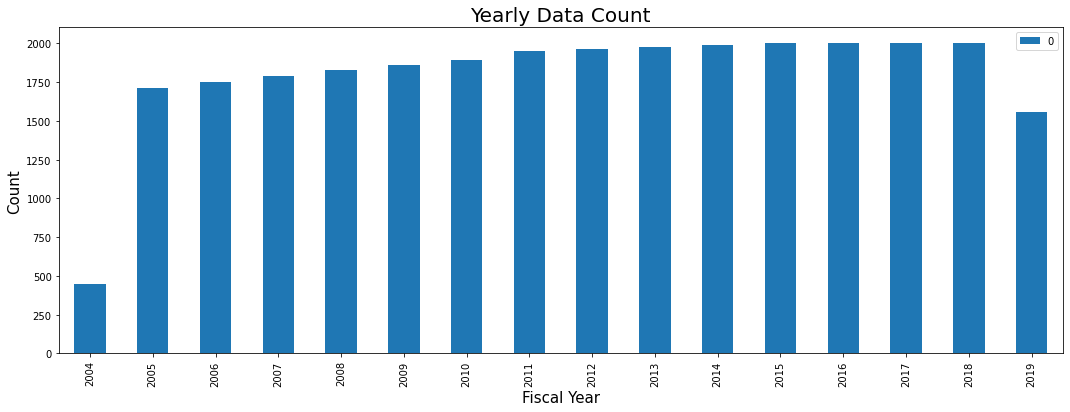

In [ ]:
fyear=isin.groupby('fyear').size()
type(fyear)
fyearframe=fyear.to_frame()
plt.figure(figsize=(10,8))
fyearframe.plot.bar(figsize=(18,6))
plt.title('Yearly Data Count',fontsize=20)
plt.xlabel('Fiscal Year',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


Then, we want to have a look of yearly average/median assets.

In [ ]:
# We build up a pivot table
att=isin.groupby(by=["fyear"]).aggregate({"at":["mean","median"]})
att_1=att.pivot_table(index="fyear", values=['at'])

In [ ]:
att

at             
               mean       median
fyear                           
2004   1.678455e+06  244707.0000
2005   1.402476e+06   12501.8760
2006   1.539922e+06   15024.0000
2007   1.698485e+06   17001.6000
2008   1.878725e+06   18298.6270
2009   1.944324e+06   18875.2120
2010   2.066062e+06   19918.6000
2011   2.102175e+06   20822.0000
2012   2.298421e+06   22061.3285
2013   2.679232e+06   23119.9060
2014   2.865269e+06   25326.1000
2015   3.049262e+06   26974.8700
2016   3.239574e+06   29258.5610
2017   3.439564e+06   30879.3870
2018   3.667396e+06   32304.7100
2019   4.088603e+06   21499.3880

We did plot of Yearly Average Assets to have a better understanding, and we find that the assets are showing the increasing trend.

<Figure size 720x576 with 0 Axes>

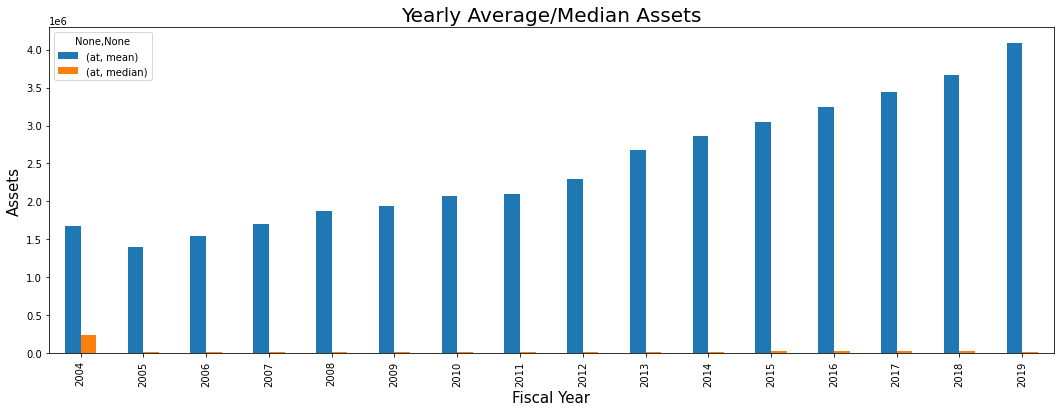

In [ ]:
plt.figure(figsize=(10,8))
att_1.plot.bar(figsize=(18,6))
plt.title('Yearly Average/Median Assets',fontsize=20)
plt.xlabel('Fiscal Year',fontsize=15)
plt.ylabel('Assets',fontsize=15)
plt.show()

After having a look at assets mean and median, we want to know more about it by getting distribution plot to check whether it shows the similar siutaiton as the above plot.We build up wide pivot table for yearly assets


In [ ]:
at2=isin[['fyear','at']]
at_wide=at2.pivot(columns='fyear',values='at')
at_wide.head()

fyear,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,812.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,832.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,840.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,767.798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,851.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We create a plot for Yearly Assets Distribution. There is not an apparent concentration, while most assets are smaller than 10000000

(0.0, 60000000.0)

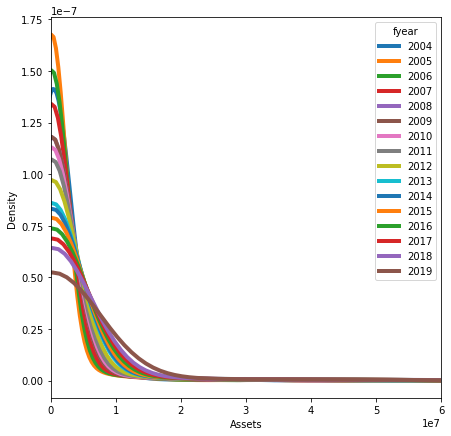

In [ ]:
at_wide.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
plt.xlabel("Assets")
plt.xlim(0,60000000)

From the plot, there is not an apparent concentration, while most assets are smaller than 10000000

After knowing the general situation, we also researched yearly country frequency 

In [ ]:
isin[['fyear','fic']]
fic_year=isin.groupby(['fyear', 'fic']).size()
type(fic_year)
cross=fic_year.to_frame()
cross

0
fyear fic     
2004  AUS    3
      AUT    3
      BMU    5
      BRA    1
      CHE    2
...        ...
2019  THA   20
      TUR   14
      TWN  178
      VGB    1
      ZAF   57

[1031 rows x 1 columns]

We merged the data above with the external data by matching the column year and ISIN.

In [27]:
df=pd.read_csv("EE-ISIN_merged.csv")
df.head()

,Unnamed: 0,ISIN,Year,CompanyName,Country,Industry(Exiobase),EnvironmentalIntensity(Sales),EnvironmentalIntensity(OpInc),TotalEnvironmentalCost,WorkingCapacity,FishProductionCapacity,CropProductionCapacity,MeatProductionCapacity,Biodiversity,AbioticResources,Waterproductioncapacity(Drinkingwater&IrrigationWater),WoodProductionCapacity,SDG1.5,SDG2.1,SDG2.2,SDG2.3,SDG2.4,SDG3.3,SDG3.4,SDG3.9,SDG6,SDG12.2,SDG14.1,SDG14.2,SDG14.3,SDG14.c,SDG15.1,SDG15.2,SDG15.5,%Imputed,gvkey,fyear,datadate,at,isin,conm,fic,sic
0,0,MYL1818OO003,2019,BURSA MALAYSIA BHD,Malaysia,Activities auxiliary to financial intermediati...,-0.02,-3.47%,-1968379.0,-1924910,-451,"-25,349","-5,938",-81,-168,"-11,502",20,"-852,646","-502,708","-502,460","-6,337","-6,337","-81,118","-4,791",-27,"-11,502",-168,-1,-1,-222,-2,10,10,-79,4%,272691,2019,20191231,2321.040,MYL1818OO003,BURSA MALAYSIA BHD,MYS,6200.0
1,1,GB0031638363,2019,INTERTEK GROUP PLC,United Kingdom,Activities auxiliary to financial intermediati...,-0.02,-9.49%,-60599272.0,-59281663,"-13,774","-788,289","-184,802","-2,487","-3,804","-324,960",508,"-26,533,166","-15,557,810","-15,550,827","-197,072","-197,072","-2,509,207","284,215",-703,"-324,960","-3,804",-17,-4,"-6,861",-20,254,254,"-2,470",1%,252384,2019,20191231,2818.400,GB0031638363,INTERTEK GROUP PLC,GBR,8700.0
2,2,ZAE000079711,2019,JSE LIMITED,South Africa,Activities auxiliary to financial intermediati...,-0.01,NaN,-2290124.0,-2239814,-510,"-29,662","-6,938",-93,-901,"-12,200",-6,"-995,881","-576,811","-576,488","-7,415","-7,415","-92,910","-19,470",-277,"-12,200",-901,0,-1,-253,0,-3,-3,-93,2%,278391,2019,20191231,40227.215,ZAE000079711,JSE LIMITED,ZAF,6211.0
3,3,FR0006174348,2019,BUREAU VERITAS SA,France,Activities auxiliary to financial intermediati...,-0.01,-5.10%,-39978650.0,-39107612,"-9,330","-520,701","-121,953","-1,671","-4,116","-214,438","1,172","-17,514,837","-10,430,409","-10,425,281","-130,175","-130,175","-1,684,676","561,195",-577,"-214,438","-4,116",-38,-9,"-4,607",-45,586,586,"-1,633",3%,286961,2019,20191231,7049.100,FR0006174348,BUREAU VERITAS SA,FRA,8700.0
4,4,GB0007370074,2019,RICARDO PLC,United Kingdom,Activities auxiliary to financial intermediati...,-0.01,-7.27%,-3247235.0,-3176408,-753,"-42,228","-9,899",-135,-468,"-17,406",63,"-1,421,576","-842,731","-842,343","-10,557","-10,557","-136,060","34,998",-87,"-17,406",-468,-2,0,-373,-2,31,31,-133,3%,221859,2019,20190630,371.900,GB0007370074,RICARDO PLC,GBR,8711.0


Check for the missing datat in the merged datatset

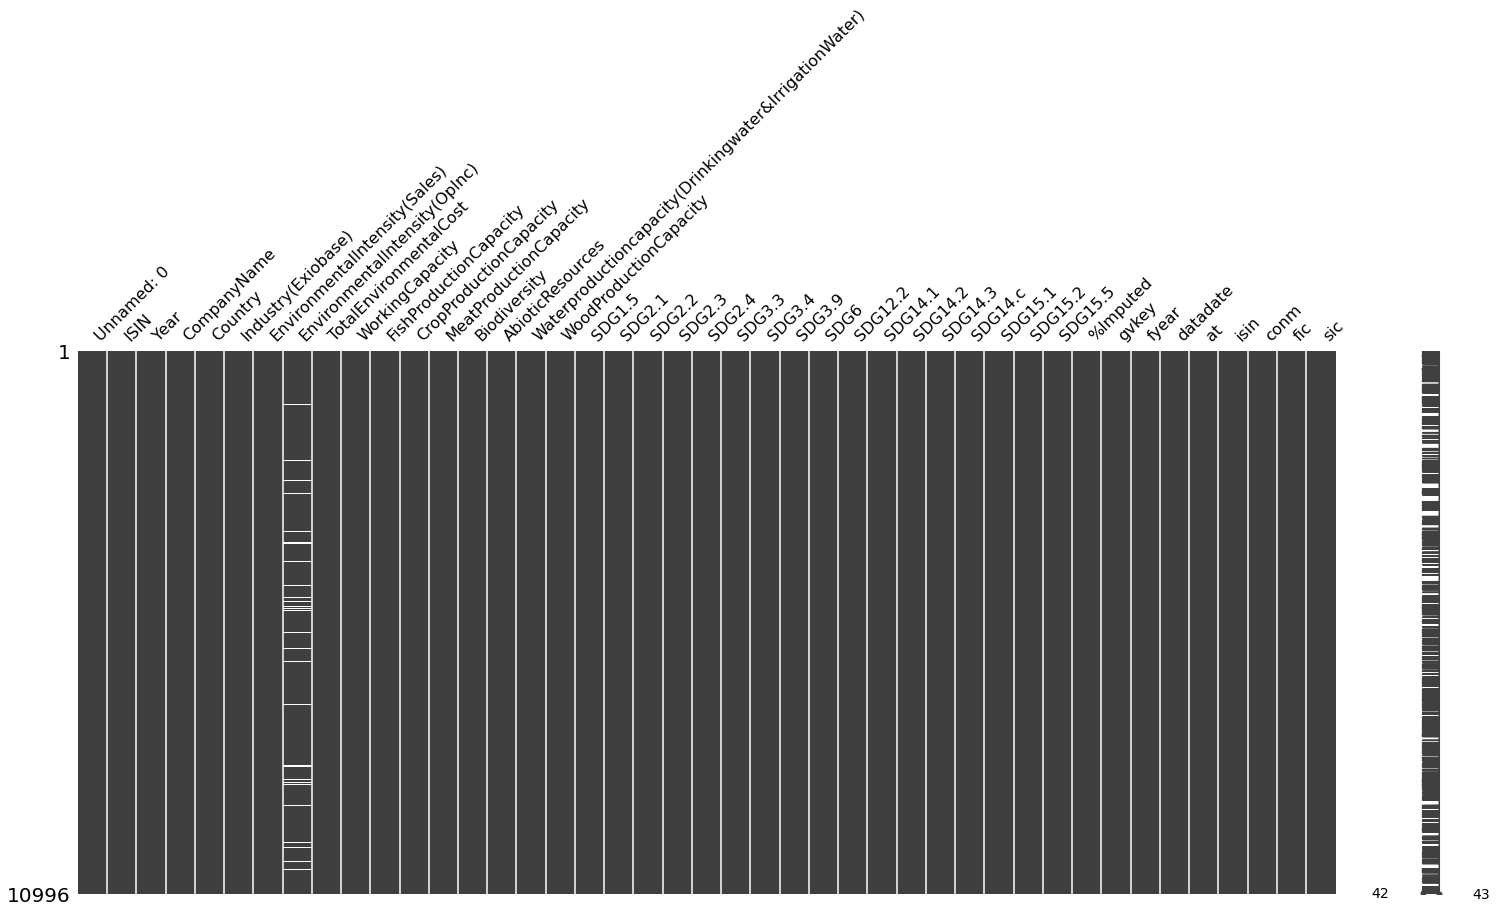

In [10]:
msno.matrix(df);

We trying to see the correlation between each variable in the merged dataset.

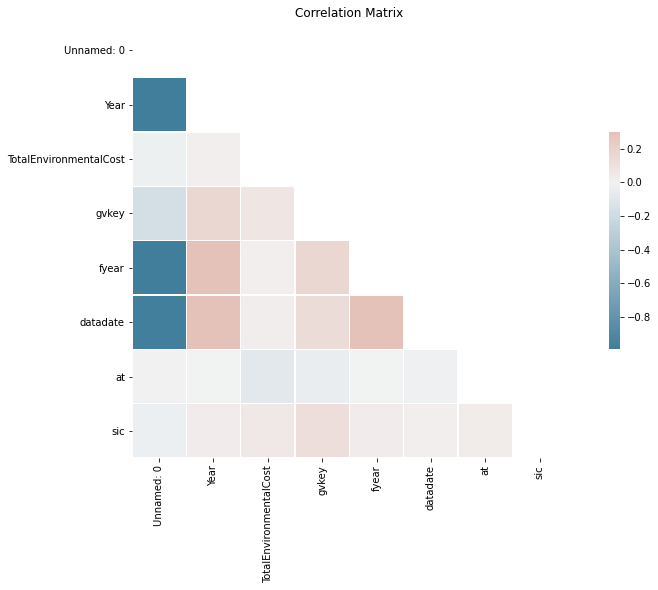

In [24]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlation Matrix')
plt.savefig('correlation_matrix.png', facecolor='white', edgecolor='none', bbox_inches = 'tight')


The majority of the companies have negative environmental cost and concentrated around 0, working capacity around -10,000,000,000 and most of the environmental intensity are negative.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

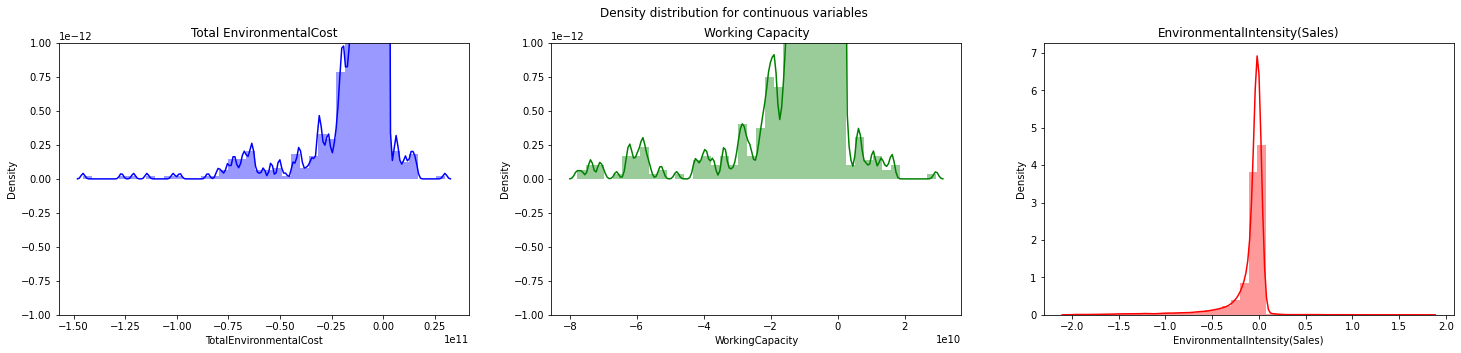

In [29]:

fig, axs = plt.subplots(1,3, figsize=(25,5));
fig.suptitle('Density distribution for continuous variables');
sns.distplot(df.TotalEnvironmentalCost, ax=axs[0], color='b', bins = 40);
axs[0].set_title('Total EnvironmentalCost');
sns.distplot(df.WorkingCapacity, ax=axs[1], color='g', bins = 40);
axs[1].set_title('Working Capacity');
sns.distplot(df['EnvironmentalIntensity(Sales)'], ax=axs[2], color='r', bins = 40);
axs[2].set_title('EnvironmentalIntensity(Sales)');
#plt.savefig('density_distribution.png', facecolor='white', edgecolor='none', bbox_inches = 'tight')

Let's see this into more detail. Let's plot some boxplots for these three features to get a better idea. Do we have outliers?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


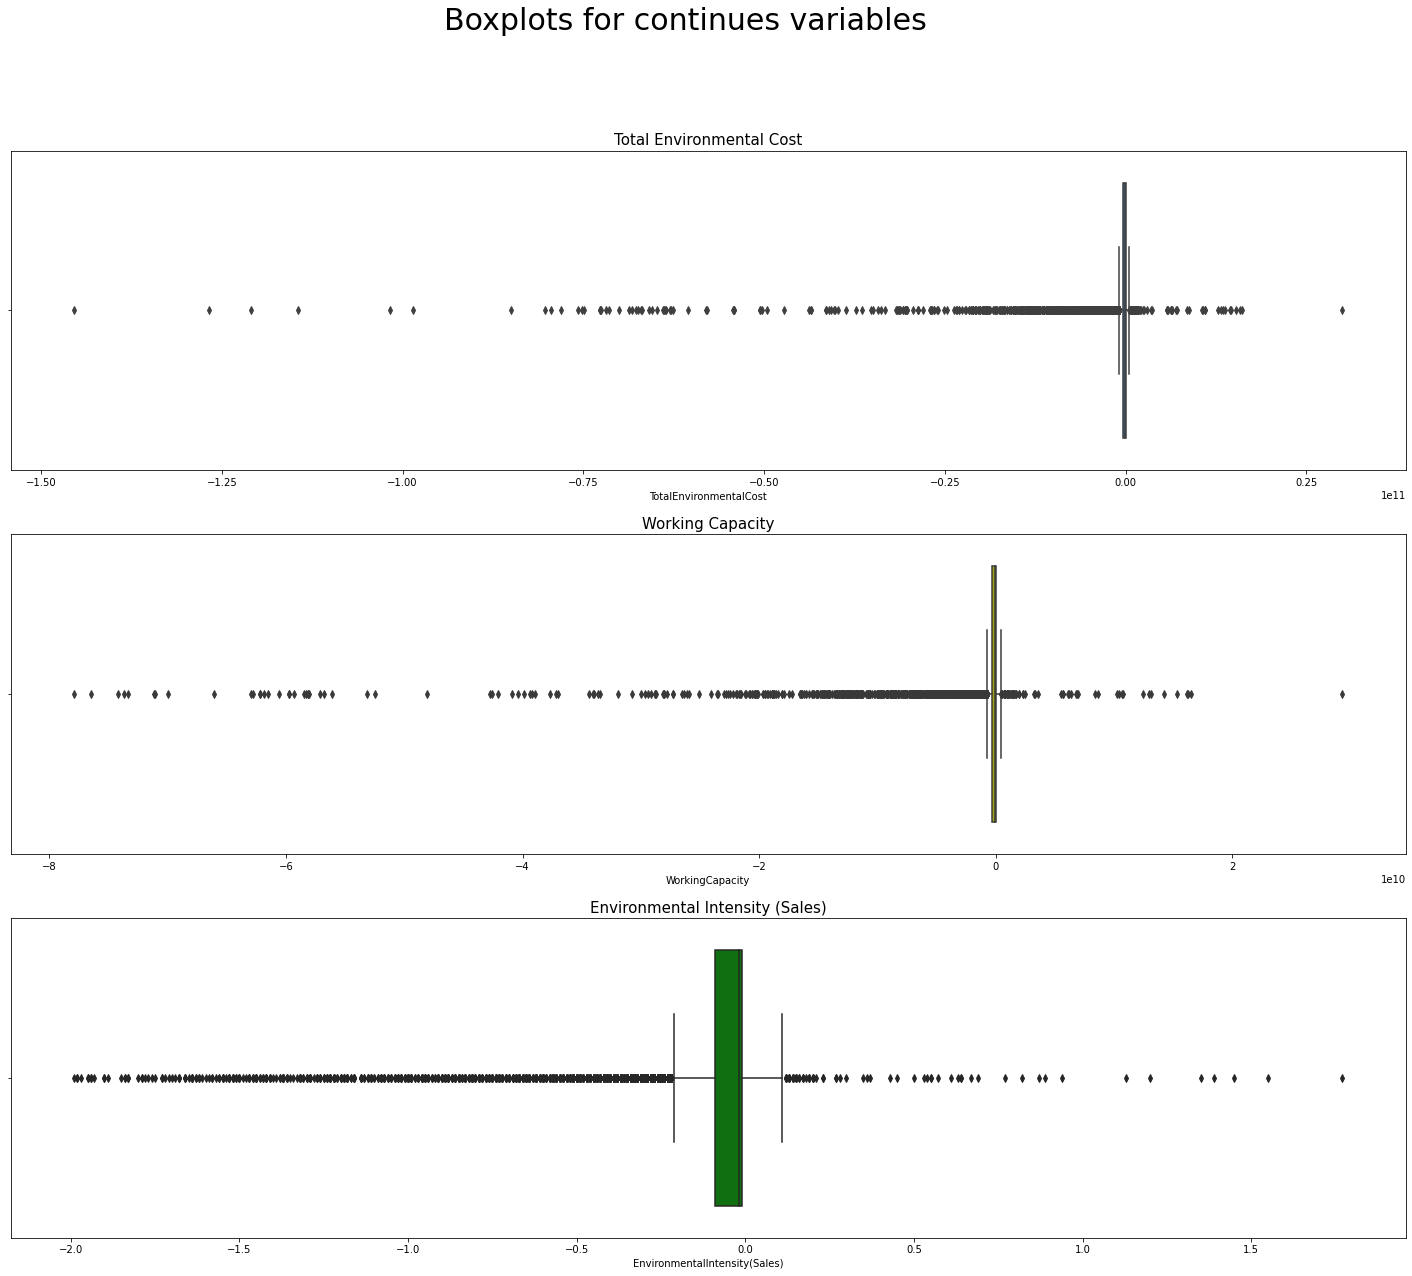

In [30]:
fig, axs = plt.subplots(3,1, figsize=(25,20));
fig.suptitle('Boxplots for continues variables', fontsize= 30);
sns.boxplot(df.TotalEnvironmentalCost, ax=axs[0]);
axs[0].set_title('Total Environmental Cost', fontsize= 15);
sns.boxplot(df.WorkingCapacity, ax=axs[1], color='y');
axs[1].set_title('Working Capacity', fontsize= 15);
sns.boxplot(df['EnvironmentalIntensity(Sales)'], ax=axs[2], color='g');
axs[2].set_title('Environmental Intensity (Sales)', fontsize= 15);

As the boxplots presents, we are dealing with a lot of outliers in each feature. For Total Environmental Costs and Working Capacity, we have companies with values smaller than the lower 25% of the values. We are dealing with a lot of companies with negative Total Environmental Costs and Working Capacity.

The plot in the below presents outliers in both side of the whiskers.

Having all of this outliers could potentially affect our predictive models. We need to consider this values when deciding what machine learning techniques we decide to apply.

Let's try and see which companies are possibly the outliers in the dataset.